In [ ]:
import pandas as pd
import pathlib

import sys
sys.path.append("../utils")

In [ ]:
cell_health_hash = "30ea5de393eb9cfc10b575582aa9f0f857b44c59"
cell_health_labels_link = f"https://raw.github.com/broadinstitute/cell-health/{cell_health_hash}/1.generate-profiles/data/consensus/cell_health_median.tsv.gz"

cell_health_labels = pd.read_csv(cell_health_labels_link, compression="gzip", sep="\t")
cell_health_labels

In [ ]:
cell_health_data_hash = "4ee08b16f4b5c5266309a295b0a1697f0b9540b8"
plate_classifications_dir_link = f"https://github.com/WayScience/cell-health-data/raw/{cell_health_data_hash}/4.classify-features/plate_classifications"
plate_names = ["SQ00014610", "SQ00014611", "SQ00014612", "SQ00014613", "SQ00014614", "SQ00014615", "SQ00014616", "SQ00014617", "SQ00014618"]

cell_line_plates = {
    "A549": ["SQ00014610", "SQ00014611", "SQ00014612"],
    "ES2": ["SQ00014613", "SQ00014614", "SQ00014615"],
    "HCC44": ["SQ00014616", "SQ00014617", "SQ00014618"],
}

In [ ]:
def create_classification_profiles(plate_classifications_dir_link: str, cell_line_plates: dict) -> pd.DataFrame:
    cell_line_classification_profiles = []
    
    for cell_line in cell_line_plates:
        print(f"Creating classification profiles for cell line {cell_line}")
        # create one large dataframe for all 3 plates in the particular cell line 
        cell_line_plate_names = cell_line_plates[cell_line]
        cell_line_plate_classifications = []
        for cell_line_plate_name in cell_line_plate_names:
            print(f"Loading plate {cell_line_plate_name}")
            plate_classifications_link = f"{plate_classifications_dir_link}/{cell_line_plate_name}_cell_classifications.csv.gz"
            plate_classifications = pd.read_csv(plate_classifications_link, compression="gzip", index_col=0)
            cell_line_plate_classifications.append(plate_classifications)
        cell_line_plate_classifications = pd.concat(cell_line_plate_classifications, axis=0).reset_index(drop=True)
        
        # create dataframe with cell classifications averaged across pertubation, include cell line metadata
        print("Averaging classification across perturbation metadata...")
        # add cell line metadata, rename pertubation column
        cell_line_plate_classifications["Metadata_cell_line"] = cell_line
        cell_line_plate_classifications = cell_line_plate_classifications.rename(columns={"Metadata_Reagent": "Metadata_pert_name"})
        
        # get rid of extra metadata columns
        phenotypic_classes = [col for col in cell_line_plate_classifications.columns.tolist() if "Metadata" not in col]
        phenotypic_classes.remove("Location_Center_X")
        phenotypic_classes.remove("Location_Center_Y")
        columns_to_keep = ["Metadata_pert_name", "Metadata_cell_line"] + phenotypic_classes
        cell_line_plate_classifications = cell_line_plate_classifications[columns_to_keep]
        
        # average across pertubation
        cell_line_classification_profile = cell_line_plate_classifications.groupby(["Metadata_pert_name", "Metadata_cell_line"]).mean()
        cell_line_classification_profiles.append(cell_line_classification_profile)
    
    return pd.concat(cell_line_classification_profiles, axis=0).reset_index(level=["Metadata_pert_name", "Metadata_cell_line"])


test = create_classification_profiles(plate_classifications_dir_link, cell_line_plates)
test

In [6]:
cell_health_labels

,Metadata_profile_id,Metadata_pert_name,Metadata_cell_line,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,...,vb_num_live_cells,vb_percent_all_apoptosis,vb_percent_caspase_dead_only,vb_percent_dead,vb_percent_dead_only,vb_percent_early_apoptosis,vb_percent_late_apoptosis,vb_percent_live,vb_ros_back_mean,vb_ros_mean
0,profile_0,AKT1-1,A549,0.008156,0.587977,0.018820,0.381501,0.176564,0.187675,-0.170616,...,0.399842,0.000000,-0.118976,-0.132871,-0.121090,0.000000,0.000000,0.132882,0.806970,1.293984
1,profile_1,AKT1-2,A549,0.056667,1.264627,0.241450,0.568443,0.235304,0.372684,-0.276888,...,0.101670,0.318027,0.621374,0.100032,0.074036,0.132751,0.467027,-0.099917,0.558041,1.151867
2,profile_2,ARID1B-1,A549,0.111163,1.092964,0.151393,0.290203,0.402121,0.481700,-0.276980,...,0.080701,0.339100,0.598093,0.055951,0.042014,0.165161,0.247058,-0.055920,-0.393937,0.103202
3,profile_3,ARID1B-2,A549,-0.061528,0.320829,-0.091007,0.141819,-0.378769,-0.288693,-0.108741,...,0.265754,0.098699,0.371930,-0.063935,-0.055160,0.138654,0.000000,0.063946,0.210005,0.055291
4,profile_4,ATF4-1,A549,3.967818,0.003400,3.268615,-2.246887,2.891737,2.878938,2.853995,...,-2.343919,0.000000,-0.089544,0.141535,0.131393,0.000000,0.000000,-0.141397,-0.631390,0.106477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,profile_352,TXN-2,HCC44,-0.342210,0.215623,0.375192,0.900283,-0.116349,-0.083793,0.207844,...,1.568620,-0.409888,0.148385,-0.519448,-0.372714,-0.136141,-0.502358,0.520090,0.182738,-0.116806
353,profile_353,XBP-1,HCC44,-0.247848,0.564827,-0.422787,0.780852,-0.074603,0.000000,-0.123090,...,0.344139,0.172909,0.839550,-0.212904,-0.245979,0.417994,0.028582,0.213691,0.245257,0.105633
354,profile_354,XBP-2,HCC44,-0.349572,-0.303116,-0.458782,0.434831,-0.157653,-0.058808,-0.404611,...,1.341318,-0.069684,0.540557,-0.146842,-0.288259,-0.179506,0.047976,0.147173,0.744648,0.023499
355,profile_355,YAP1-1,HCC44,-0.240422,0.408734,-0.351545,0.387100,-0.132059,0.002797,-0.059520,...,0.091803,-0.155056,-0.025451,-0.097891,-0.080691,-0.227172,-0.114292,0.098480,0.451868,0.127519


In [7]:
test

,Metadata_pert_name,Metadata_cell_line,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,AKT1-1,A549,0.054932,0.027755,0.021307,0.048169,0.116542,0.027095,0.040155,0.030093,0.221322,0.019687,0.040099,0.037670,0.098610,0.129647,0.041857,0.045061
1,AKT1-2,A549,0.052757,0.026695,0.022417,0.047275,0.113333,0.026610,0.041179,0.034239,0.233669,0.021312,0.039802,0.036686,0.089843,0.128045,0.041199,0.044936
2,ARID1B-1,A549,0.040267,0.028365,0.021202,0.047656,0.119522,0.024333,0.039460,0.035141,0.290153,0.028437,0.035434,0.040248,0.044184,0.136870,0.033468,0.035259
3,ARID1B-2,A549,0.045109,0.030562,0.021584,0.041333,0.123428,0.027050,0.039057,0.028491,0.293695,0.026684,0.033261,0.043536,0.045784,0.124731,0.036990,0.038706
4,ATF4-1,A549,0.026970,0.035827,0.016918,0.013856,0.090874,0.028103,0.019467,0.016642,0.508466,0.039001,0.016502,0.052635,0.012241,0.061432,0.035789,0.025276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,XBP-1,HCC44,0.032277,0.027736,0.029891,0.053386,0.107091,0.041403,0.038645,0.041323,0.282075,0.041348,0.033903,0.048170,0.044153,0.108327,0.035608,0.034663
353,XBP-2,HCC44,0.032669,0.029002,0.031823,0.054948,0.106691,0.039883,0.036857,0.046972,0.265102,0.041838,0.035828,0.047439,0.045634,0.112850,0.035914,0.036549
354,YAP1-1,HCC44,0.034511,0.027847,0.037634,0.050009,0.087623,0.043881,0.047348,0.056616,0.191724,0.036977,0.032514,0.039765,0.137421,0.088149,0.047577,0.040405
355,YAP1-2,HCC44,0.033771,0.028334,0.030037,0.056260,0.105229,0.038985,0.033854,0.043182,0.256354,0.042508,0.036015,0.045088,0.074877,0.092741,0.042136,0.040629


In [9]:
final_profile_matrix = pd.merge(cell_health_labels, test, on=["Metadata_pert_name", "Metadata_cell_line"]) #DOESNT MERGE CONTROLS
final_profile_matrix

,Metadata_profile_id,Metadata_pert_name,Metadata_cell_line,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,...,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,profile_0,AKT1-1,A549,0.008156,0.587977,0.018820,0.381501,0.176564,0.187675,-0.170616,...,0.040155,0.030093,0.221322,0.019687,0.040099,0.037670,0.098610,0.129647,0.041857,0.045061
1,profile_1,AKT1-2,A549,0.056667,1.264627,0.241450,0.568443,0.235304,0.372684,-0.276888,...,0.041179,0.034239,0.233669,0.021312,0.039802,0.036686,0.089843,0.128045,0.041199,0.044936
2,profile_2,ARID1B-1,A549,0.111163,1.092964,0.151393,0.290203,0.402121,0.481700,-0.276980,...,0.039460,0.035141,0.290153,0.028437,0.035434,0.040248,0.044184,0.136870,0.033468,0.035259
3,profile_3,ARID1B-2,A549,-0.061528,0.320829,-0.091007,0.141819,-0.378769,-0.288693,-0.108741,...,0.039057,0.028491,0.293695,0.026684,0.033261,0.043536,0.045784,0.124731,0.036990,0.038706
4,profile_4,ATF4-1,A549,3.967818,0.003400,3.268615,-2.246887,2.891737,2.878938,2.853995,...,0.019467,0.016642,0.508466,0.039001,0.016502,0.052635,0.012241,0.061432,0.035789,0.025276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,profile_352,TXN-2,HCC44,-0.342210,0.215623,0.375192,0.900283,-0.116349,-0.083793,0.207844,...,0.042297,0.045487,0.242511,0.044597,0.034945,0.048240,0.061386,0.106988,0.041195,0.040591
350,profile_353,XBP-1,HCC44,-0.247848,0.564827,-0.422787,0.780852,-0.074603,0.000000,-0.123090,...,0.038645,0.041323,0.282075,0.041348,0.033903,0.048170,0.044153,0.108327,0.035608,0.034663
351,profile_354,XBP-2,HCC44,-0.349572,-0.303116,-0.458782,0.434831,-0.157653,-0.058808,-0.404611,...,0.036857,0.046972,0.265102,0.041838,0.035828,0.047439,0.045634,0.112850,0.035914,0.036549
352,profile_355,YAP1-1,HCC44,-0.240422,0.408734,-0.351545,0.387100,-0.132059,0.002797,-0.059520,...,0.047348,0.056616,0.191724,0.036977,0.032514,0.039765,0.137421,0.088149,0.047577,0.040405


In [13]:
pearson_corr = final_profile_matrix.corr(method="pearson")
pearson_corr

,cc_all_high_h2ax,cc_all_large_notround_polynuclear_mean,cc_all_large_round_polyploid_mean,cc_all_n_objects,cc_all_n_spots_h2ax_mean,cc_all_n_spots_h2ax_per_nucleus_area_mean,cc_all_nucleus_area_mean,cc_all_nucleus_roundness_mean,cc_cc_early_mitosis,cc_cc_g1,...,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
cc_all_high_h2ax,1.000000,0.086975,0.279427,-0.366115,0.883626,0.791566,0.585233,-0.001469,0.160269,0.310411,...,-0.057424,-0.210902,0.190453,0.328771,-0.350037,0.149609,-0.234886,0.157100,-0.126545,-0.314587
cc_all_large_notround_polynuclear_mean,0.086975,1.000000,0.639305,-0.095104,-0.017665,0.065630,0.127687,-0.156300,0.063702,-0.339784,...,0.121300,-0.152301,-0.099025,-0.191034,0.013088,-0.099144,0.123815,0.248893,0.055251,0.114175
cc_all_large_round_polyploid_mean,0.279427,0.639305,1.000000,-0.359795,0.145951,0.206667,0.431131,-0.011344,0.081306,-0.320750,...,-0.015104,-0.229881,0.147329,-0.063543,-0.206631,0.090006,-0.036629,-0.001262,0.037634,0.036335
cc_all_n_objects,-0.366115,-0.095104,-0.359795,1.000000,-0.211933,-0.291577,-0.228722,0.309824,-0.391498,-0.189312,...,-0.139966,0.547522,-0.240432,-0.129084,0.589061,-0.544299,0.321083,0.151967,-0.496766,0.225104
cc_all_n_spots_h2ax_mean,0.883626,-0.017665,0.145951,-0.211933,1.000000,0.910023,0.599013,0.293436,0.095129,0.429594,...,-0.122348,-0.124483,0.257930,0.395740,-0.316185,0.123723,-0.271855,0.140417,-0.283951,-0.366781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MetaphaseAlignment,0.149609,-0.099144,0.090006,-0.544299,0.123723,0.159477,0.089758,-0.118341,0.127598,0.180000,...,0.315054,-0.408744,0.350739,0.112552,-0.580860,1.000000,-0.482481,-0.196279,0.383974,-0.422325
OutOfFocus,-0.234886,0.123815,-0.036629,0.321083,-0.271855,-0.292151,-0.291511,0.001634,-0.031935,-0.327786,...,0.139183,0.539383,-0.638051,-0.186372,0.475071,-0.482481,1.000000,0.082176,0.019893,0.363440
Polylobed,0.157100,0.248893,-0.001262,0.151967,0.140417,0.118893,0.065135,-0.173118,0.043008,0.001130,...,0.310221,-0.015356,-0.322753,0.203241,-0.002087,-0.196279,0.082176,1.000000,-0.229438,-0.325259
Prometaphase,-0.126545,0.055251,0.037634,-0.496766,-0.283951,-0.166919,-0.282391,-0.468121,0.317046,0.012005,...,0.403243,-0.259645,-0.358756,0.018408,-0.125657,0.383974,0.019893,-0.229438,1.000000,0.226001


<AxesSubplot:>

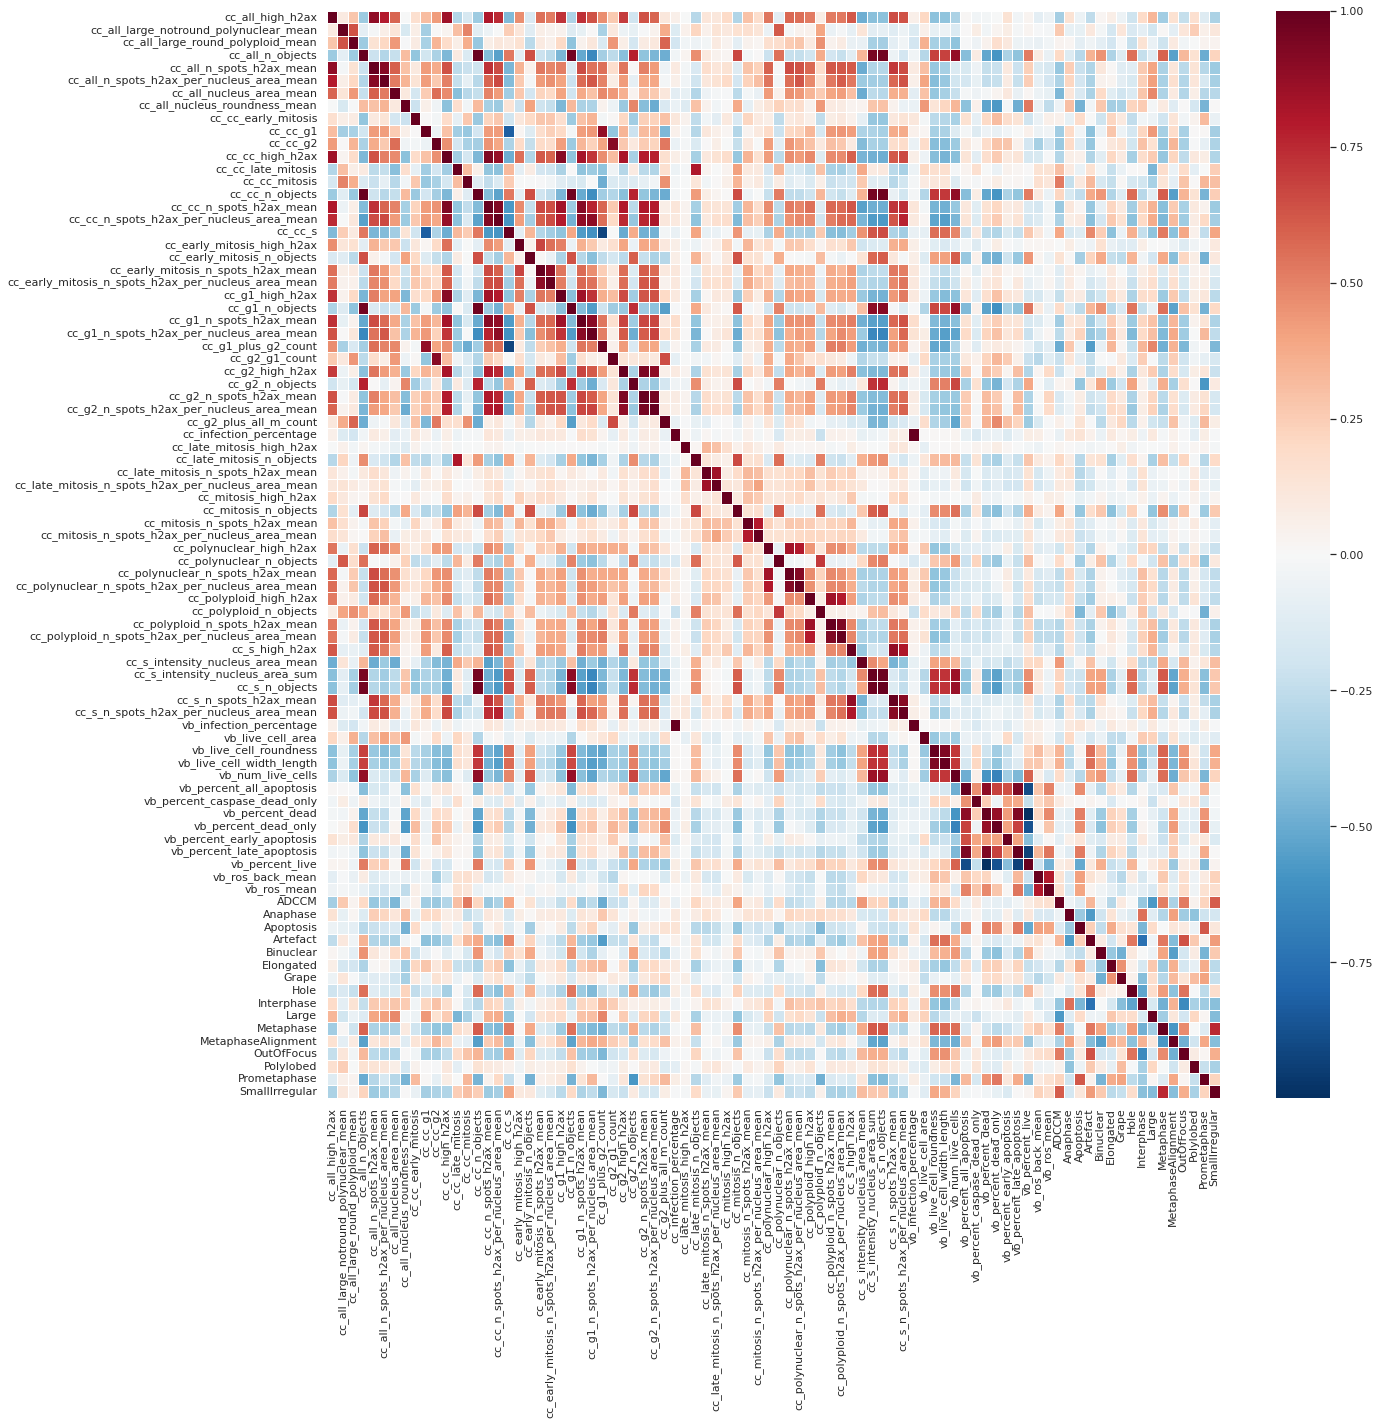

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            linewidth=0.5)